In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('../data/ENB2012_data_with_columns.csv')

# Check for NaN values and replace or drop them
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [3]:
# Define input and output variables
X = data.iloc[:, :-2]
y_hl = data['Heating_Load']
y_cl = data['Cooling_Load']

In [4]:
# Initialize models with best parameters
best_params_hl = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
best_params_cl = {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}

xgb_model_hl = XGBRegressor(**best_params_hl)
xgb_model_cl = XGBRegressor(**best_params_cl)

In [5]:
# Lists to store metrics for each run
r2_train_list_hl = []
r2_test_list_hl = []
r2_train_list_cl = []
r2_test_list_cl = []

In [6]:
# Run the model 30 times for Heating Load
for run in range(30):
    kf = KFold(n_splits=10, shuffle=True, random_state=run)
    r2_train_fold_hl = []
    r2_test_fold_hl = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_hl.iloc[train_index], y_hl.iloc[test_index]
        
        # Train the model
        xgb_model_hl.fit(X_train, y_train)
        
        # Predict
        y_pred_train = xgb_model_hl.predict(X_train)
        y_pred_test = xgb_model_hl.predict(X_test)
        
        # Calculate R-squared
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        
        r2_train_fold_hl.append(r2_train)
        r2_test_fold_hl.append(r2_test)
    
    r2_train_list_hl.append(np.mean(r2_train_fold_hl))
    r2_test_list_hl.append(np.mean(r2_test_fold_hl))

In [7]:
# Run the model 30 times for Cooling Load
for run in range(30):
    kf = KFold(n_splits=10, shuffle=True, random_state=run)
    r2_train_fold_cl = []
    r2_test_fold_cl = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_cl.iloc[train_index], y_cl.iloc[test_index]
        
        # Train the model
        xgb_model_cl.fit(X_train, y_train)
        
        # Predict
        y_pred_train = xgb_model_cl.predict(X_train)
        y_pred_test = xgb_model_cl.predict(X_test)
        
        # Calculate R-squared
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        
        r2_train_fold_cl.append(r2_train)
        r2_test_fold_cl.append(r2_test)
    
    r2_train_list_cl.append(np.mean(r2_train_fold_cl))
    r2_test_list_cl.append(np.mean(r2_test_fold_cl))

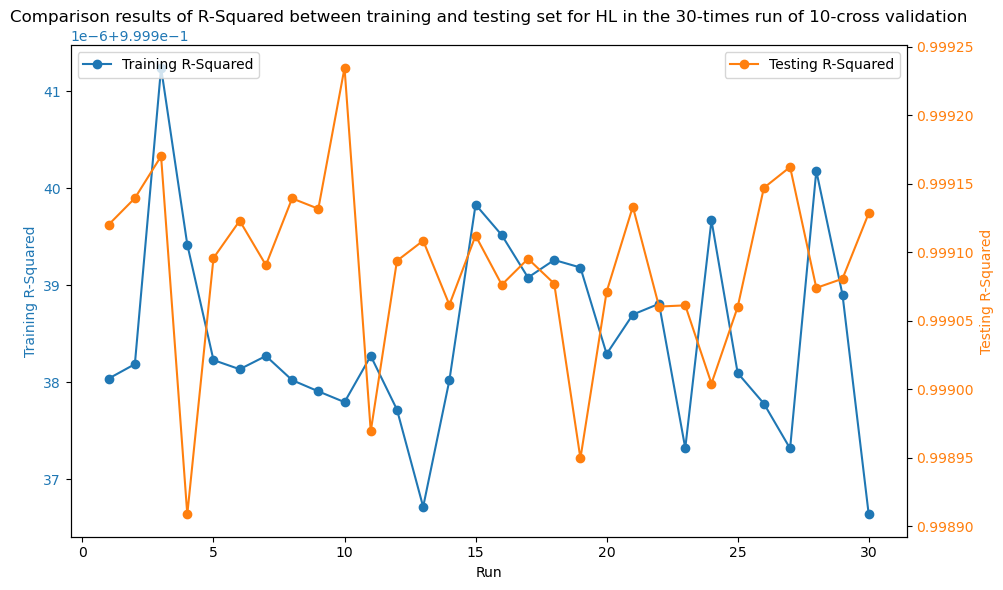

In [8]:
# Create the plot for Heating Load
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared for Training
color = 'tab:blue'
ax1.set_xlabel('Run')
ax1.set_ylabel('Training R-Squared', color=color)
ax1.plot(range(1, 31), r2_train_list_hl, color=color, marker='o', label='Training R-Squared')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Testing R-Squared', color=color)
ax2.plot(range(1, 31), r2_test_list_hl, color=color, marker='o', linestyle='-', label='Testing R-Squared')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Comparison results of R-Squared between training and testing set for HL in the 30-times run of 10-cross validation')
fig.tight_layout()  # Ensure the plot fits into the figure area
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot
plt.savefig('../results/figures/r2_train_vs_test_hl_30_runs.png')

# Show the plot
plt.show()

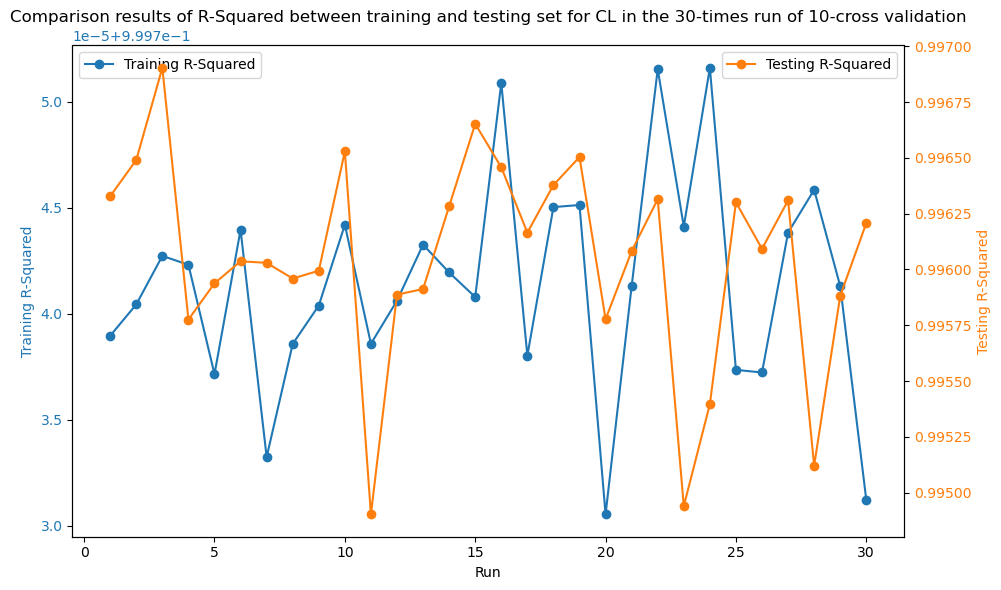

In [9]:
# Create the plot for Cooling Load
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R-Squared for Training
color = 'tab:blue'
ax1.set_xlabel('Run')
ax1.set_ylabel('Training R-Squared', color=color)
ax1.plot(range(1, 31), r2_train_list_cl, color=color, marker='o', label='Training R-Squared')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Testing R-Squared', color=color)
ax2.plot(range(1, 31), r2_test_list_cl, color=color, marker='o', linestyle='-', label='Testing R-Squared')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Comparison results of R-Squared between training and testing set for CL in the 30-times run of 10-cross validation')
fig.tight_layout()  # Ensure the plot fits into the figure area
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot
plt.savefig('../results/figures/r2_train_vs_test_cl_30_runs.png')

# Show the plot
plt.show()

In [10]:
# Create DataFrame for Heating Load metrics
df_hl = pd.DataFrame({
    'Run': range(1, 31),
    'R2_Train_HL': r2_train_list_hl,
    'R2_Test_HL': r2_test_list_hl
})

# Create DataFrame for Cooling Load metrics
df_cl = pd.DataFrame({
    'Run': range(1, 31),
    'R2_Train_CL': r2_train_list_cl,
    'R2_Test_CL': r2_test_list_cl
})

# Write the data to an Excel file
with pd.ExcelWriter('../results/metrics/r2_train_test_metrics.xlsx') as writer:
    df_hl.to_excel(writer, sheet_name='Heating Load', index=False)
    df_cl.to_excel(writer, sheet_name='Cooling Load', index=False)